In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [7]:
unemployment_data = pd.read_csv("../data/unemployed.csv")
nigerian_suicide_cases = pd.read_csv("../data/nigerian_suicide_cases.csv")

In [8]:
unemployment_data.head()

,country,indicator,group,Unit,Date,Value
0,Nigeria,LABOUR FORCE POPULATION (employment age and de...,All Groups,Persons,2010,6.517063e+07
1,Nigeria,LABOUR FORCE POPULATION (employment age and de...,All Groups,Persons,2011,6.725609e+07
2,Nigeria,LABOUR FORCE POPULATION (employment age and de...,All Groups,Persons,2012,6.910578e+07
3,Nigeria,LABOUR FORCE POPULATION (employment age and de...,All Groups,Persons,2013,7.110580e+07
4,Nigeria,LABOUR FORCE POPULATION (employment age and de...,All Groups,Persons,2014Q1,7.164117e+07


In [9]:
nigerian_suicide_cases.head()

,Unnamed: 0,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,DIM_SEX,DIM_AGE,RATE_PER_100000_N,RATE_PER_100000_NL,RATE_PER_100000_NU
0,79,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2001,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,MALE,TOTAL,6.92,3.93,11.3773
1,80,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2010,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,MALE,TOTAL,6.36,3.91,10.1658
2,87,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2005,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,MALE,TOTAL,6.66,3.87,11.1323
3,311,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2019,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,TOTAL,TOTAL,3.49,1.95,5.8400
4,646,16BBF41SDGSUICIDE,SDGSUICIDE,16BBF41,SDGSUICIDE,2004,YEAR,566,COUNTRY,PUBLISHED,Suicide deaths,Nigeria,FEMALE,TOTAL,2.85,1.52,4.4600


In [10]:
len(unemployment_data), len(nigerian_suicide_cases)

(4563, 93)

# PREPARE DATA

In [11]:
nigerian_suicide_cases.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
nigerian_suicide_cases['Date'] = nigerian_suicide_cases['DIM_TIME'].copy()

In [19]:
print(sorted(nigerian_suicide_cases["DIM_TIME"].unique()))

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [21]:
unemployment_data["indicator"].unique()

array(['Total Unemployed'], dtype=object)

In [24]:
unemployment_data = (unemployment_data[unemployment_data["indicator"] == "Total Unemployed"]).sort_values('Date').reset_index(drop=True)
unemployment_data

,country,indicator,group,Unit,Date,Value
0,Nigeria,Total Unemployed,All Groups,Persons,2010,3.318425e+06
1,Nigeria,Total Unemployed,25-34,Persons,2010,8.741977e+05
2,Nigeria,Total Unemployed,Below primary,Persons,2010,1.054442e+05
3,Nigeria,Total Unemployed,Primary,Persons,2010,8.116727e+05
4,Nigeria,Total Unemployed,Secondary,Persons,2010,1.170617e+06
...,...,...,...,...,...,...
422,Nigeria,Total Unemployed,Rural,Persons,2020Q4,1.490120e+07
423,Nigeria,Total Unemployed,Post Secondary,Persons,2020Q4,4.611990e+06
424,Nigeria,Total Unemployed,45-54,Persons,2020Q4,3.379825e+06
425,Nigeria,Total Unemployed,35-44,Persons,2020Q4,5.232420e+06


In [23]:
len(unemployment_data)

427

In [25]:
sui_mask = nigerian_suicide_cases[['DIM_TIME','RATE_PER_100000_N','DIM_SEX','DIM_AGE','Date','GEO_NAME_SHORT']]
sui_mask

,DIM_TIME,RATE_PER_100000_N,DIM_SEX,DIM_AGE,Date,GEO_NAME_SHORT
0,2001,6.92,MALE,TOTAL,2001,Nigeria
1,2010,6.36,MALE,TOTAL,2010,Nigeria
2,2005,6.66,MALE,TOTAL,2005,Nigeria
3,2019,3.49,TOTAL,TOTAL,2019,Nigeria
4,2004,2.85,FEMALE,TOTAL,2004,Nigeria
...,...,...,...,...,...,...
88,2019,41.78,MALE,Y65T74,2019,Nigeria
89,2019,29.62,TOTAL,Y65T74,2019,Nigeria
90,2019,49.62,TOTAL,Y75T84,2019,Nigeria
91,2019,76.47,MALE,Y75T84,2019,Nigeria


In [27]:
print("unemployment_data Date dtype:", unemployment_data['Date'].dtype)
print("sui_mask Date dtype:", sui_mask['Date'].dtype)

unemployment_data Date dtype: object
sui_mask Date dtype: int64


In [30]:
unemployment_data.loc[:, 'Date'] = unemployment_data['Date'].astype(str)
sui_mask.loc[:, 'Date'] = sui_mask['Date'].astype(str)

In [31]:
merged_su1 = unemployment_data.merge(sui_mask, on='Date', how='inner')
merged_su1

,country,indicator,group,Unit,Date,Value,DIM_TIME,RATE_PER_100000_N,DIM_SEX,DIM_AGE,GEO_NAME_SHORT
0,Nigeria,Total Unemployed,All Groups,Persons,2010,3.318425e+06,2010,6.36,MALE,TOTAL,Nigeria
1,Nigeria,Total Unemployed,All Groups,Persons,2010,3.318425e+06,2010,4.40,TOTAL,TOTAL,Nigeria
2,Nigeria,Total Unemployed,All Groups,Persons,2010,3.318425e+06,2010,2.40,FEMALE,TOTAL,Nigeria
3,Nigeria,Total Unemployed,25-34,Persons,2010,8.741977e+05,2010,6.36,MALE,TOTAL,Nigeria
4,Nigeria,Total Unemployed,25-34,Persons,2010,8.741977e+05,2010,4.40,TOTAL,TOTAL,Nigeria
...,...,...,...,...,...,...,...,...,...,...,...
172,Nigeria,Total Unemployed,Never Attended,Persons,2013,2.154951e+06,2013,5.88,MALE,TOTAL,Nigeria
173,Nigeria,Total Unemployed,Never Attended,Persons,2013,2.154951e+06,2013,2.18,FEMALE,TOTAL,Nigeria
174,Nigeria,Total Unemployed,All Groups,Persons,2013,7.078454e+06,2013,4.05,TOTAL,TOTAL,Nigeria
175,Nigeria,Total Unemployed,All Groups,Persons,2013,7.078454e+06,2013,5.88,MALE,TOTAL,Nigeria


In [31]:
merged_su1 = unemployment_data.merge(sui_mask, on='Date', how='inner')
merged_su1

,country,indicator,group,Unit,Date,Value,DIM_TIME,RATE_PER_100000_N,DIM_SEX,DIM_AGE,GEO_NAME_SHORT
0,Nigeria,Total Unemployed,All Groups,Persons,2010,3.318425e+06,2010,6.36,MALE,TOTAL,Nigeria
1,Nigeria,Total Unemployed,All Groups,Persons,2010,3.318425e+06,2010,4.40,TOTAL,TOTAL,Nigeria
2,Nigeria,Total Unemployed,All Groups,Persons,2010,3.318425e+06,2010,2.40,FEMALE,TOTAL,Nigeria
3,Nigeria,Total Unemployed,25-34,Persons,2010,8.741977e+05,2010,6.36,MALE,TOTAL,Nigeria
4,Nigeria,Total Unemployed,25-34,Persons,2010,8.741977e+05,2010,4.40,TOTAL,TOTAL,Nigeria
...,...,...,...,...,...,...,...,...,...,...,...
172,Nigeria,Total Unemployed,Never Attended,Persons,2013,2.154951e+06,2013,5.88,MALE,TOTAL,Nigeria
173,Nigeria,Total Unemployed,Never Attended,Persons,2013,2.154951e+06,2013,2.18,FEMALE,TOTAL,Nigeria
174,Nigeria,Total Unemployed,All Groups,Persons,2013,7.078454e+06,2013,4.05,TOTAL,TOTAL,Nigeria
175,Nigeria,Total Unemployed,All Groups,Persons,2013,7.078454e+06,2013,5.88,MALE,TOTAL,Nigeria


In [33]:
print("Merged rows:", len(merged_su1))

Merged rows: 177


In [34]:
print(merged_su1['Date'].unique())
print(merged_su1.isnull().sum())  

['2010' '2011' '2012' '2013']
country              0
indicator            0
group                0
Unit                 0
Date                 0
Value                0
DIM_TIME             0
RATE_PER_100000_N    0
DIM_SEX              0
DIM_AGE              0
GEO_NAME_SHORT       0
dtype: int64


In [49]:
# Check columns and data types
print(merged_su1.columns.tolist())
print(merged_su1[['Value', 'RATE_PER_100000_N', 'Date', 'DIM_SEX', 'GEO_NAME_SHORT']].describe())

# Check for missing values
print(merged_su1[['Value', 'RATE_PER_100000_N']].isnull().sum())

['country', 'indicator', 'group', 'Unit', 'Date', 'Value', 'DIM_TIME', 'RATE_PER_100000_N', 'DIM_SEX', 'DIM_AGE', 'GEO_NAME_SHORT']
              Value  RATE_PER_100000_N
count  1.770000e+02         177.000000
mean   1.850719e+06           4.234124
std    1.581043e+06           1.597430
min    9.355950e+03           2.180000
25%    7.721526e+05           2.400000
50%    1.343868e+06           4.200000
75%    2.534933e+06           5.880000
max    7.301634e+06           6.360000
Value                0
RATE_PER_100000_N    0
dtype: int64


# VISUALIZATIONS

# scatter plot

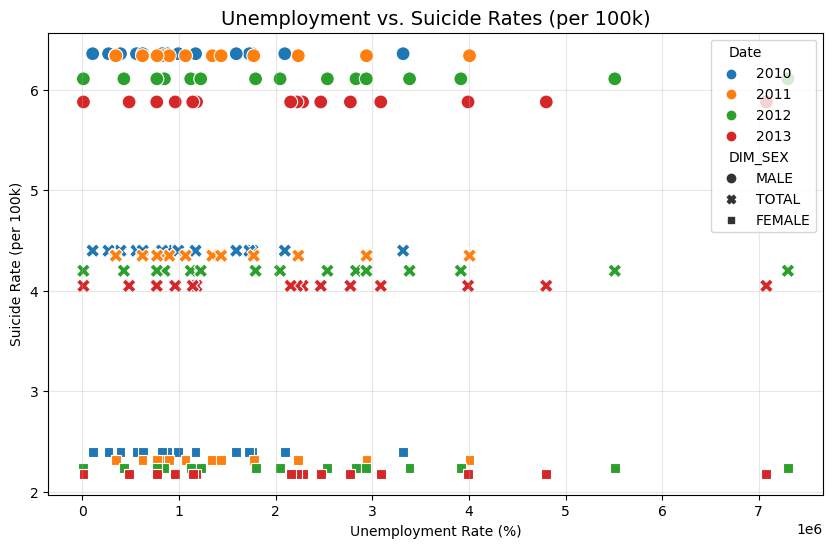

In [37]:


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_su1, 
    x='Value', 
    y='RATE_PER_100000_N',
    hue='Date',      
    style='DIM_SEX', 
    s=100           
)
plt.title("Unemployment vs. Suicide Rates (per 100k)", fontsize=14)
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Suicide Rate (per 100k)")
plt.grid(alpha=0.3)
plt.show()

# line plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

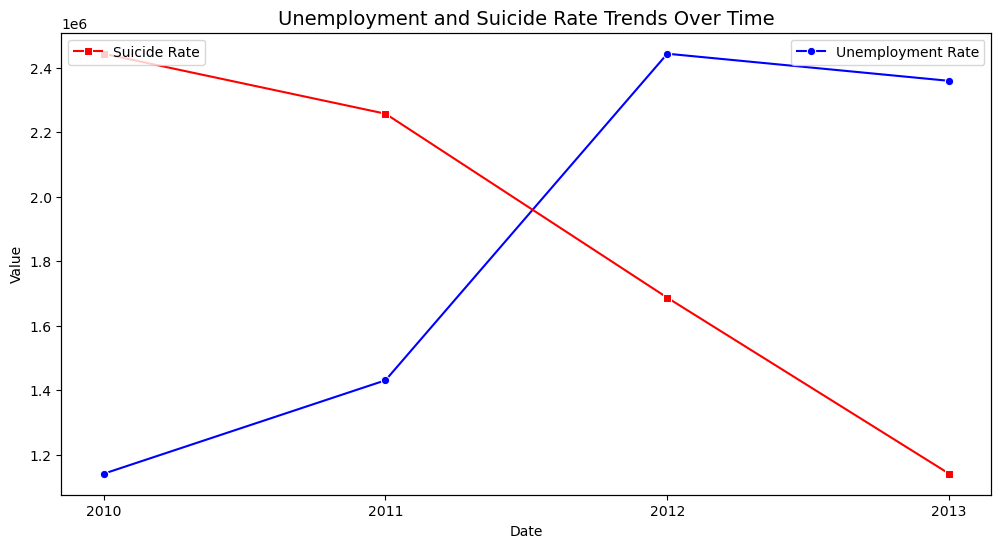

In [38]:
plt.figure(figsize=(12, 6))

# Aggregate data by Date (year)
trends = merged_su1.groupby('Date').agg({
    'Value': 'mean',               # Mean unemployment
    'RATE_PER_100000_N': 'mean'    # Mean suicide rate
}).reset_index()

# Plot unemployment trend
sns.lineplot(
    data=trends, 
    x='Date', 
    y='Value', 
    marker='o', 
    label='Unemployment Rate',
    color='blue'
)

# Plot suicide rate trend (on secondary axis)
plt.twinx()
sns.lineplot(
    data=trends, 
    x='Date', 
    y='RATE_PER_100000_N', 
    marker='s', 
    label='Suicide Rate',
    color='red'
)

plt.title("Unemployment and Suicide Rate Trends Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.gca().get_yaxis().set_visible(False)  # Hide duplicate Y-axis
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# bar chart

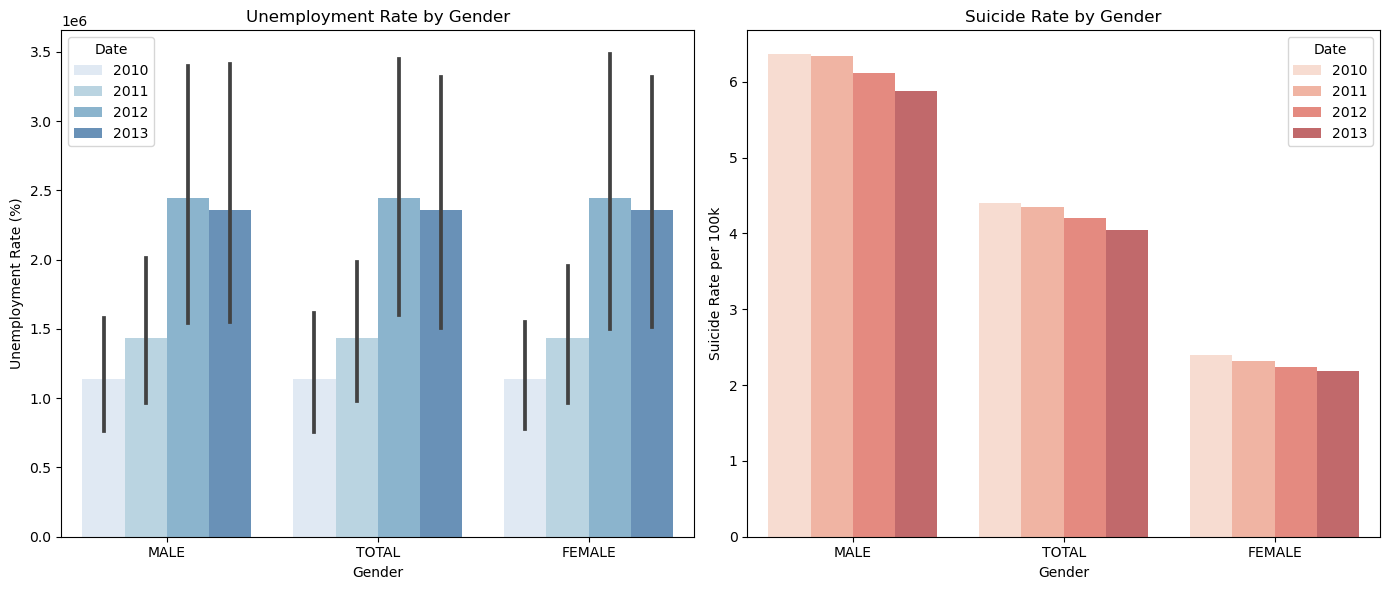

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Unemployment
sns.barplot(
    data=merged_su1, 
    x='DIM_SEX', 
    y='Value', 
    hue='Date', 
    palette='Blues',
    alpha=0.7,
    ax=axes[0]
)
axes[0].set_title("Unemployment Rate by Gender")
axes[0].set_ylabel("Unemployment Rate (%)")
axes[0].set_xlabel("Gender")

# Suicide Rate
sns.barplot(
    data=merged_su1, 
    x='DIM_SEX', 
    y='RATE_PER_100000_N', 
    hue='Date', 
    palette='Reds',
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_title("Suicide Rate by Gender")
axes[1].set_ylabel("Suicide Rate per 100k")
axes[1].set_xlabel("Gender")

plt.tight_layout()
plt.show()


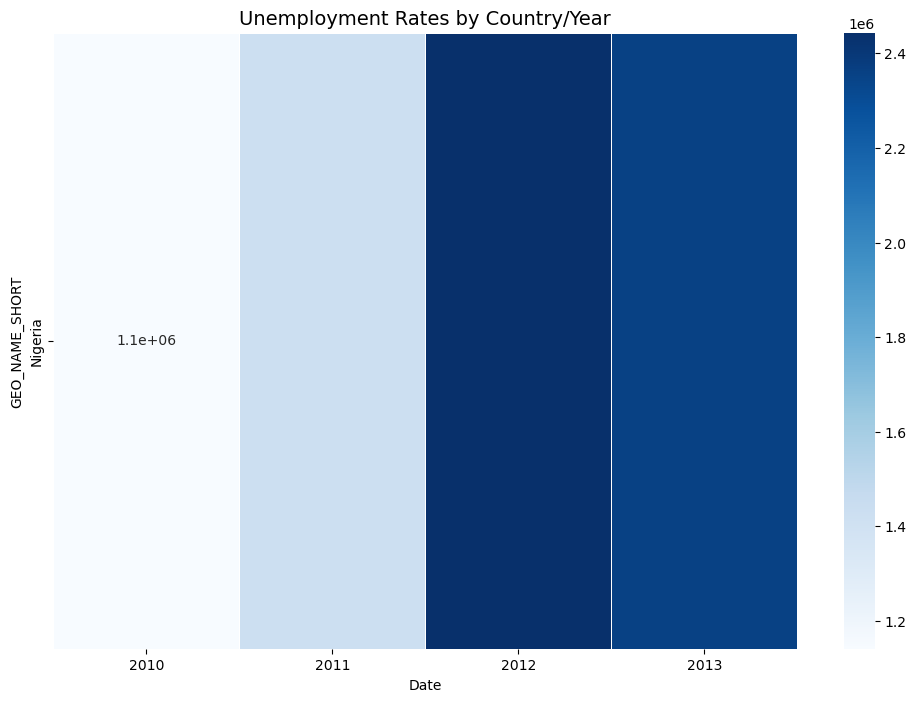

In [44]:
# Pivot table for heatmap
heatmap_data = merged_su1.pivot_table(
    index='GEO_NAME_SHORT', 
    columns='Date', 
    values=['Value', 'RATE_PER_100000_N']
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data['Value'],  # Unemployment data
    annot=True, 
    cmap='Blues',
    linewidths=0.5
)
plt.title("Unemployment Rates by Country/Year", fontsize=14)
plt.show()

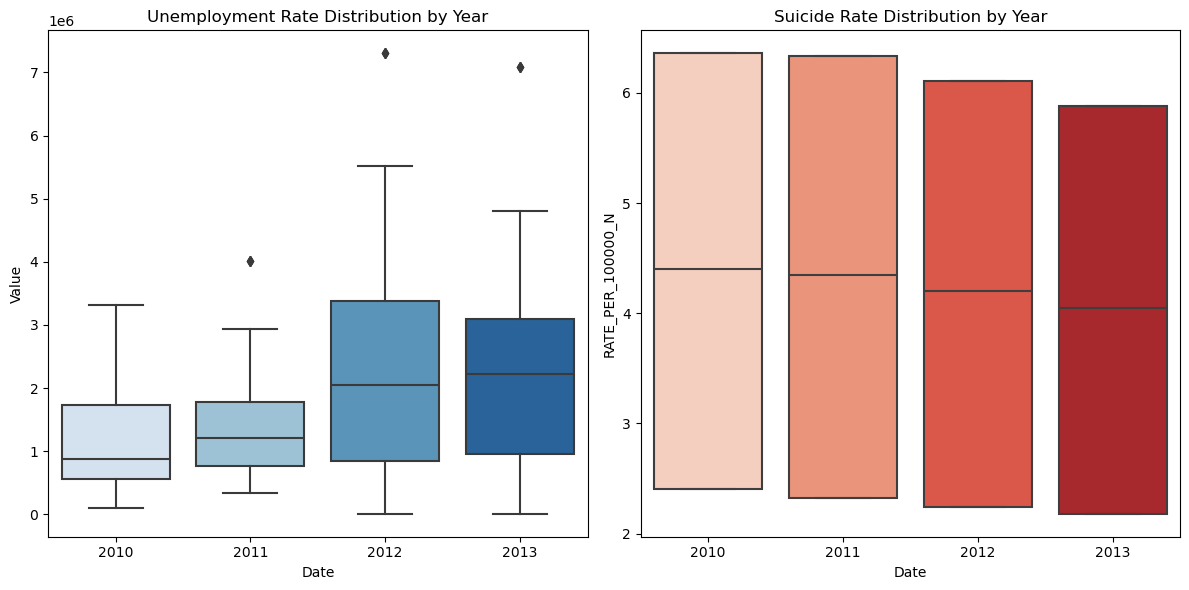

In [47]:
plt.figure(figsize=(12, 6))

# Unemployment distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=merged_su1, x='Date', y='Value', palette='Blues')
plt.title("Unemployment Rate Distribution by Year")

# Suicide rate distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_su1, x='Date', y='RATE_PER_100000_N', palette='Reds')
plt.title("Suicide Rate Distribution by Year")

plt.tight_layout()
plt.show()

In [53]:
import scipy.stats as stats

# Pearson correlation (linear relationship)
pearson_corr, p_value = stats.pearsonr(merged_su1['Value'], merged_su1['RATE_PER_100000_N'])
print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {p_value:.4f}")

# Spearman correlation (non-linear/monotonic relationship)
spearman_corr, p_value = stats.spearmanr(merged_su1['Value'], merged_su1['RATE_PER_100000_N'])
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {p_value:.4f}")

Pearson Correlation: -0.03, p-value: 0.7090
Spearman Correlation: -0.10, p-value: 0.1673


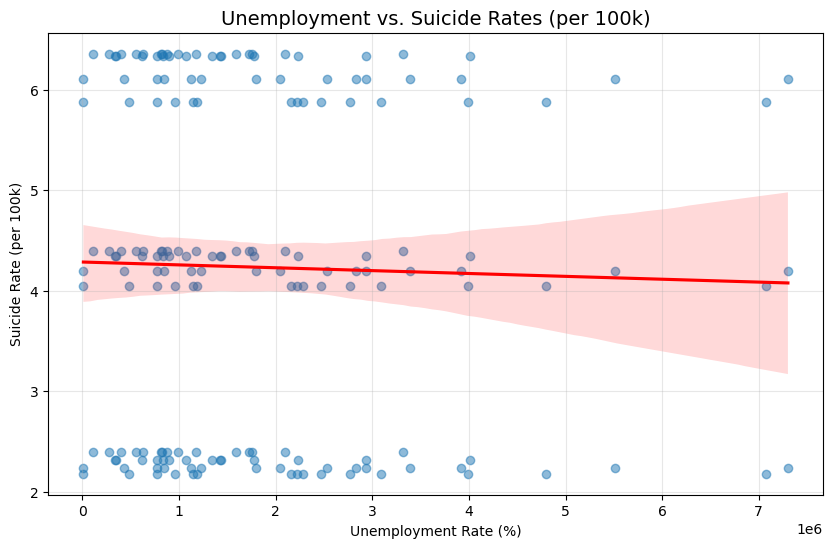

In [55]:


plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_su1,
    x='Value', 
    y='RATE_PER_100000_N',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Unemployment vs. Suicide Rates (per 100k)", fontsize=14)
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Suicide Rate (per 100k)")
plt.grid(alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

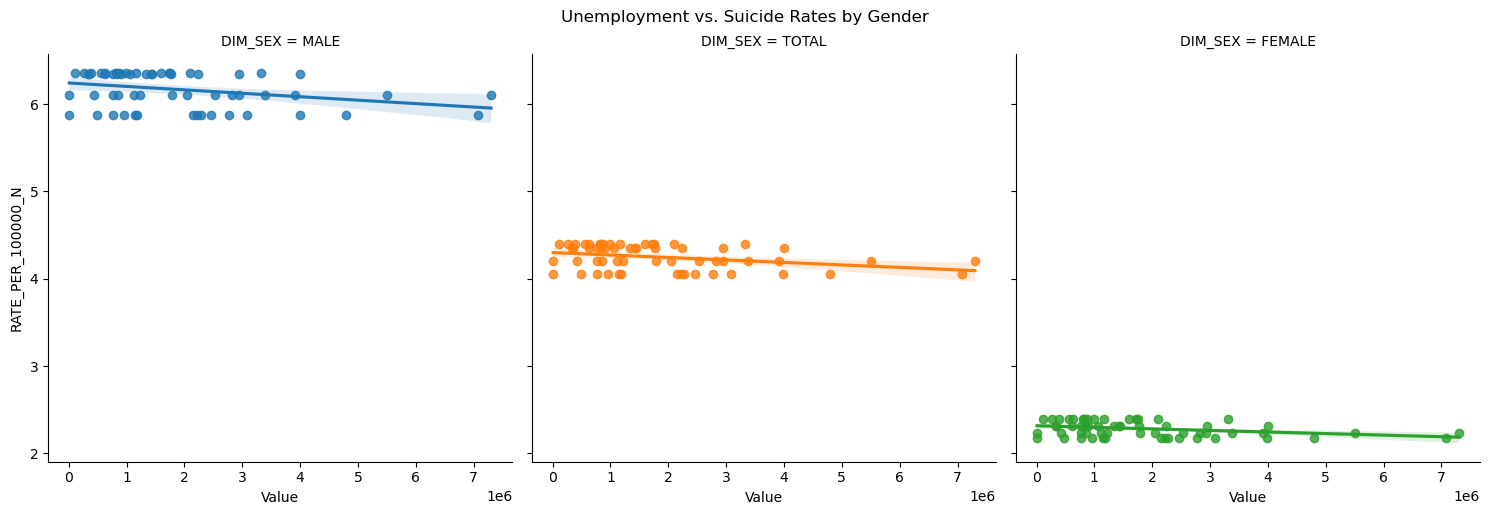

In [57]:
# Example: By gender
plt.figure(figsize=(10, 6))
sns.lmplot(
    data=merged_su1,
    x='Value',
    y='RATE_PER_100000_N',
    hue='DIM_SEX',  # Gender
    col='DIM_SEX',   # Separate plots for each gender
    height=5,
    aspect=1
)
plt.suptitle("Unemployment vs. Suicide Rates by Gender", y=1.02)
plt.show()

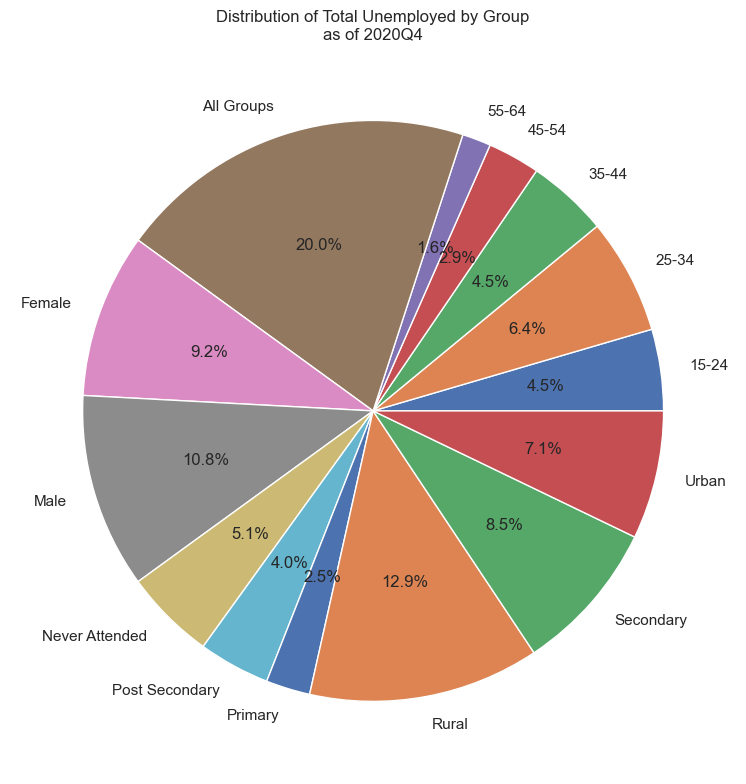

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

latest_date = unemployment_data['Date'].max()
df_latest = unemployment_data[unemployment_data['Date'] == latest_date]

# 3. Aggregate values by group
pie_series = df_latest.groupby('group')['Value'].sum()

# 4. Apply seaborn theme for styling
sns.set_theme()

# 5. Plot pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    pie_series,
    labels=pie_series.index,
    autopct='%1.1f%%'
)
ax.set_title(f"Distribution of Total Unemployed by Group\nas of {latest_date}")
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


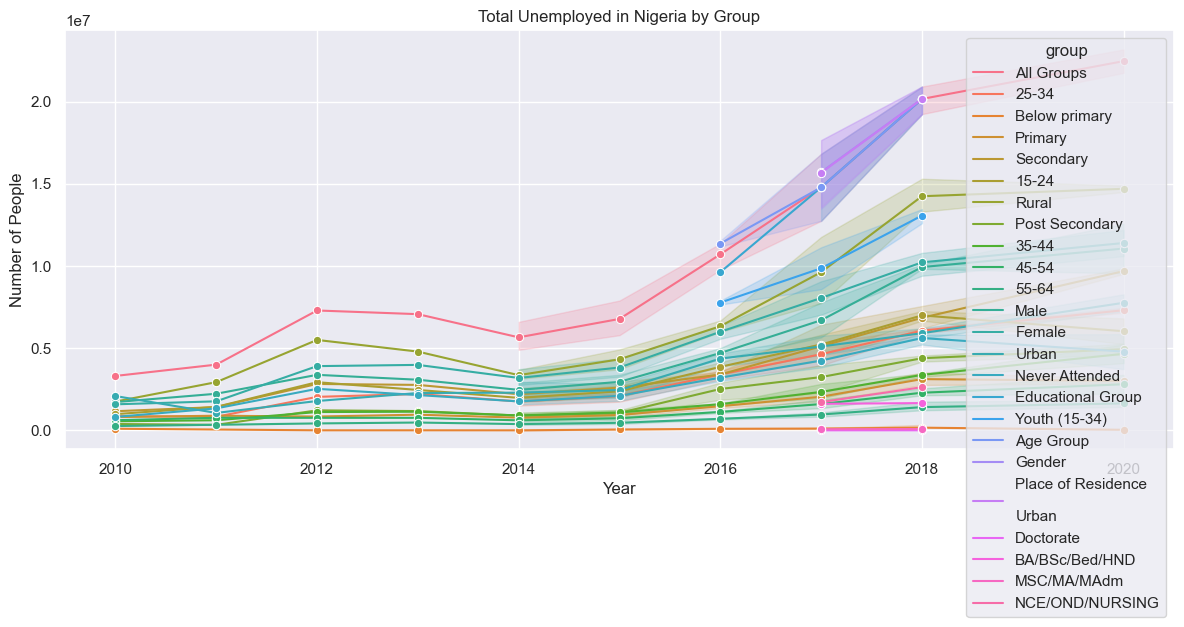

In [59]:

# Assume df is your full DataFrame
df_total = unemployment_data[unemployment_data['indicator'] == 'Total Unemployed'].copy()

# Extract Year if you haven’t already
df_total['Year'] = df_total['Date'].str.extract(r'(\d{4})').astype(int)

sns.set_theme()
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_total,
    x='Year',
    y='Value',
    hue='group',
    marker='o'
)
plt.title("Total Unemployed in Nigeria by Group")
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()


In [ ]:
print(merged_su1[['indicator', 'Unit']].drop_duplicates())
# Hypothetical: Replace 'Population' with actual population column
merged_su1['Value'] = (merged['Value'] / merged['Population']) * 100000